# Limpeza e qualidade de dados

Como exemplos, vamos trabalhar com o conjunto de dados sobre o navio Titanic. Esse é um conjunto de dados estruturado que é muito utilizado na introdução à análise de dados, à ciência de dados, à mineração de dados, etc. Portanto, há muito material e técnicas envolvendo esse conjunto como exemplo, o que facilita o aprendizado. Vamos ver como são os atributos desse dataset.

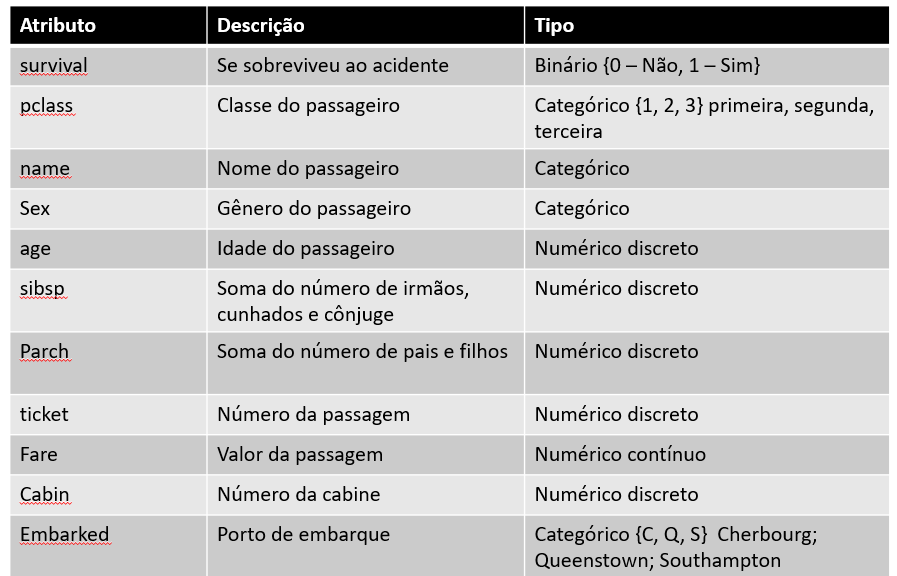

In [1]:
#carregamento dos dados
import pandas as pd


df_titanic = pd.read_csv('datasets/titanic_custom.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#deteccao de dupicatas

df_titanic.duplicated().sum()

0

In [3]:
#colunas com valor nulo

print("quantos null tem em cada campo", df_titanic.isnull().sum())
print("se tem valor null", df_titanic.isnull().any())

quantos null tem em cada campo PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
se tem valor null PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic2 = df_titanic.drop('Cabin', axis=1)
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
media_idade = df_titanic2['Age'].mean()
mediana_idade = df_titanic2['Age'].median()

print("a media é ", media_idade)
print("a mediana é: ",mediana_idade)

a media é  29.839173669467783
a mediana é:  28.0


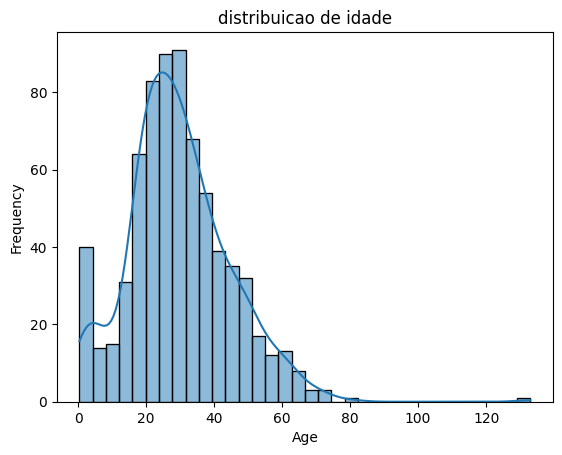

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_titanic2['Age'], kde=True)
plt.title('distribuicao de idade')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [8]:
#
df_titanic2['Age'].fillna(media_idade, inplace=True)

/tmp/ipykernel_5893/1672351570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic2['Age'].fillna(media_idade, inplace=True)


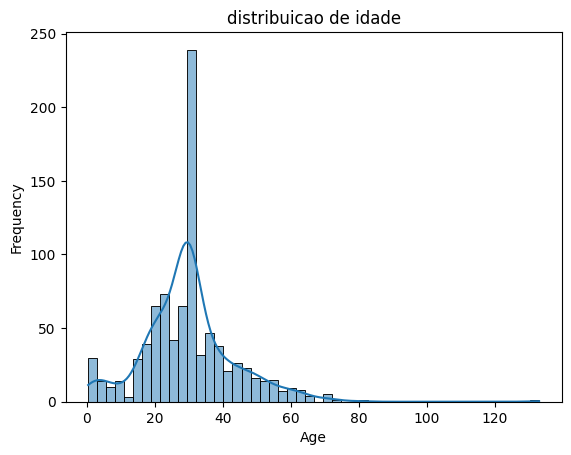

In [9]:
sns.histplot(df_titanic2['Age'], kde=True)
plt.title('distribuicao de idade')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [10]:
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


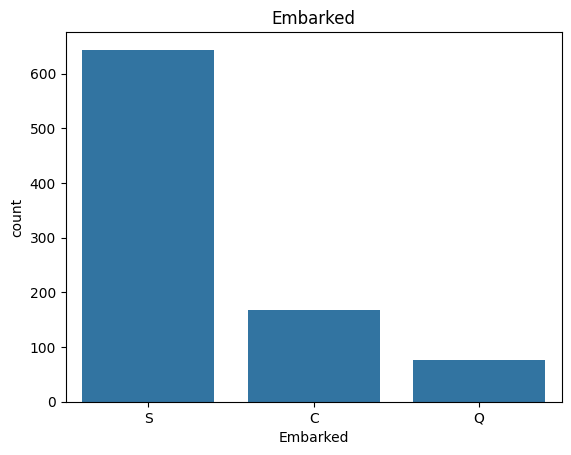

In [11]:
sns.countplot(x='Embarked', data=df_titanic2)
plt.title('Embarked')
plt.show()

In [12]:
df_titanic2['Embarked'].fillna('S', inplace=True)
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/tmp/ipykernel_5893/3635426456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic2['Embarked'].fillna('S', inplace=True)


In [13]:
df_titanic2.to_csv('datasets/titanic_custom_2.csv', index=False)

In [14]:
df_titanic2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.839174,0.523008,0.381594,37.234698
std,257.353842,0.486592,0.836071,13.454159,1.102743,0.806057,173.359298
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-10.100000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.839174,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,133.000000,8.000000,6.000000,5012.329200


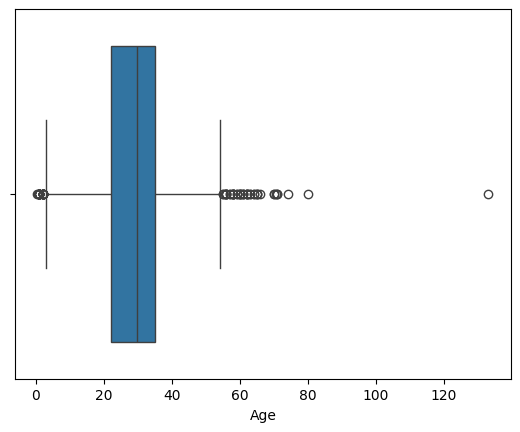

In [15]:
sns.boxplot(x=df_titanic2['Age'])
plt.show()

In [16]:
print(df_titanic2.sort_values('Age', ascending=False).head(5)['Age'])
print(df_titanic2.sort_values('Age', ascending=True).head(5)['Age'])

103    133.0
630     80.0
851     74.0
493     71.0
96      71.0
Name: Age, dtype: float64
803    0.42
755    0.67
644    0.75
469    0.75
831    0.83
Name: Age, dtype: float64


In [17]:
df_titanic2.loc[df_titanic2['Age'] == 133, 'Age'] = mediana_idade

In [18]:
print(df_titanic2.sort_values('Age', ascending=False).head(5)['Age'])

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
Name: Age, dtype: float64


In [19]:
#calcular mediana fare

mediana_Fare = df_titanic2['Fare'].median()

df_titanic2.loc[df_titanic2['Fare'] == 5012.329200, 'Fare'] = mediana_Fare

In [20]:
df_titanic2.loc[df_titanic2['Fare'] == -10.100000, 'Fare'] = mediana_Fare

df_titanic2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.721329,0.523008,0.381594,31.652969
std,257.353842,0.486592,0.836071,13.001800,1.102743,0.806057,47.012302
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,29.839174,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
